In [55]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
%matplotlib inline

In [56]:
# Read in the excel sheet of the CCS projects around the world
df = pd.read_excel("./data/CCS Map Data Jan2023.xlsx").set_index("Country Location")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, United States to Canada
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Project ID                              417 non-null    int64         
 1   Project Name                            417 non-null    object        
 2   Company                                 416 non-null    object        
 3   Plant Name                              349 non-null    object        
 4   Storage and/or Capture                  404 non-null    object        
 5   Overall Status                          407 non-null    object        
 6   Plant Status                            283 non-null    object        
 7   Project Phase                           346 non-null    object        
 8   State Location                          356 non-null    object        
 9   Specific Site Location                  399 

In [57]:
# Identify columns
df.columns

Index(['Project ID', 'Project Name', 'Company', 'Plant Name',
       'Storage and/or Capture', 'Overall Status', 'Plant Status',
       'Project Phase', 'State Location', 'Specific Site Location',
       'Size or Capture Amount/unit base power', 'Power or Capture Unit',
       'Power or Capture Unit Base Code', 'Combustion / Separation',
       'Capture Technology', 'Project Summary', 'Project Date', 'Cost',
       'Currency Name', 'Project Information Webpage', 'Latitude', 'Longitude',
       'Continent Code', 'Continent Name', 'Country Code', 'District Code',
       'DOE Support', 'Exact Checkbox', 'Exact', 'Paper',
       'Regional Partnership', 'Other', 'Scope Code', 'Scope Name',
       'State Code', 'Status Code', 'Project Type',
       'Injection Unit Base Code'],
      dtype='object')

In [58]:
# Create a new dataframe with the necessary data
locationStatus = df[[
    "Overall Status",
    "Latitude",
    "Longitude"
]]
locationStatus

,Overall Status,Latitude,Longitude
Country Location,,,
United States,NaN,43.293204,-107.602148
Romania,Hold,44.669722,23.407778
United States,Active,47.065715,-101.214290
United States,Active,47.094600,-101.309539
United States,Active,30.533711,-88.555873
...,...,...,...
France,Potential,49.464000,0.466000
Iceland,Potential,64.359210,-21.786830
United States,Active,38.030740,-121.870060


In [59]:
# Fill NAN with unidentified key word
locationStatus.loc[:, "Overall Status"] = locationStatus["Overall Status"].fillna("Unidentified")

# Replace Completed with active and replace hold and unidentified with Potential
locationStatus.loc[:, "Overall Status"] = locationStatus["Overall Status"].replace({"Completed": "Active", "Hold": "Potential", "Unidentified": "Potential"})
locationStatus

,Overall Status,Latitude,Longitude
Country Location,,,
United States,Potential,43.293204,-107.602148
Romania,Potential,44.669722,23.407778
United States,Active,47.065715,-101.214290
United States,Active,47.094600,-101.309539
United States,Active,30.533711,-88.555873
...,...,...,...
France,Potential,49.464000,0.466000
Iceland,Potential,64.359210,-21.786830
United States,Active,38.030740,-121.870060


C:\Users\Lardex\AppData\Local\Temp\ipykernel_9244\1458413312.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  WorldMap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


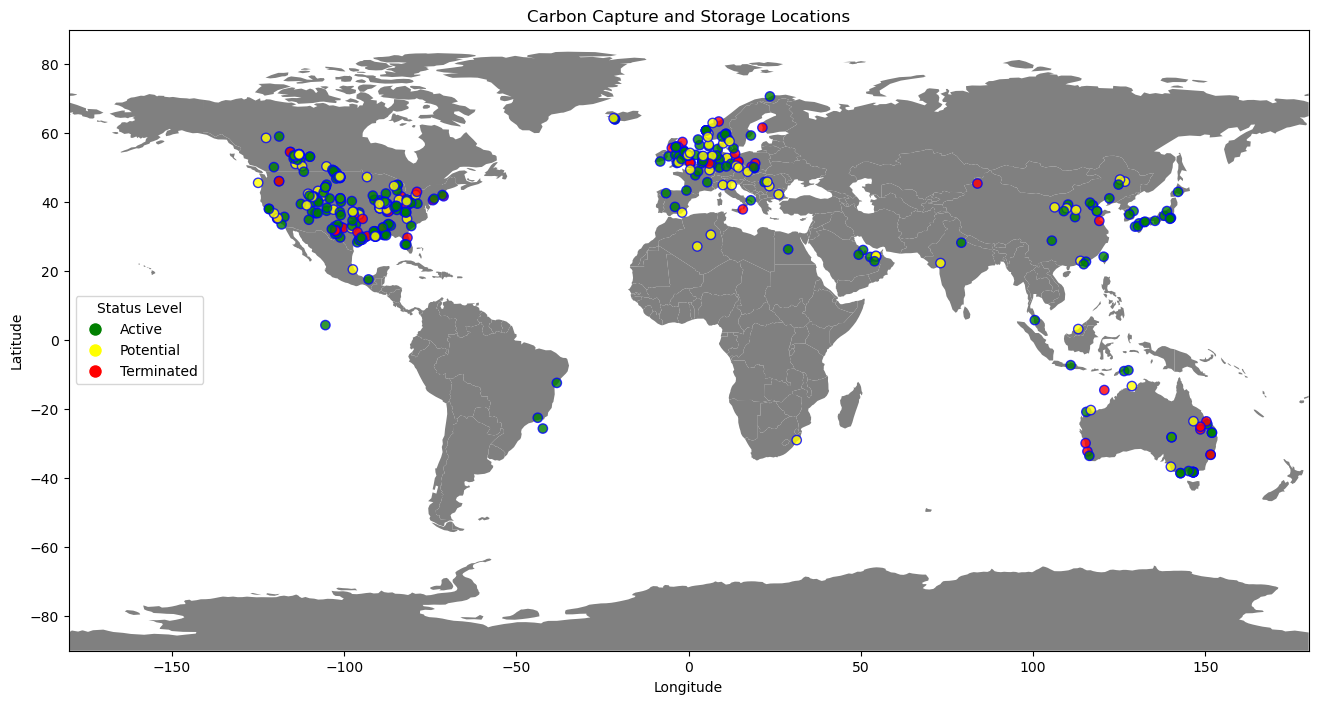

In [86]:
# Geopandas has a map of the world to use as the background of a plot
WorldMap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Change the size and color of the map in the background
fig, ax = plt.subplots(figsize=(16, 10))
WorldMap.plot(color="grey", ax=ax)

# Create variables for the latitude, longitude, status of each CCS
x = locationStatus['Longitude']
y = locationStatus['Latitude']
status = locationStatus["Overall Status"]

# Define custom colors for each status category
custom_colors = {
    'Active': 'green',
    'Potential': 'yellow',
    'Terminated': 'red'
}

# Map the status to colors for each point
point_colors = status.map(custom_colors)

# Use a scatter plot to plot the variables and show where the locations are, with color-coded points
scatter = plt.scatter(x, y, c=point_colors, alpha=0.8, edgecolors="b", s=45)

# Add limits to the plot
plt.xlim([-180, 180])
plt.ylim([-90, 90])

# Add a legend for the status level
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=status) for status, color in custom_colors.items()]
plt.legend(handles=legend_labels, title='Status Level', loc='center left')

# Add title and labels
plt.title("Carbon Capture and Storage Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

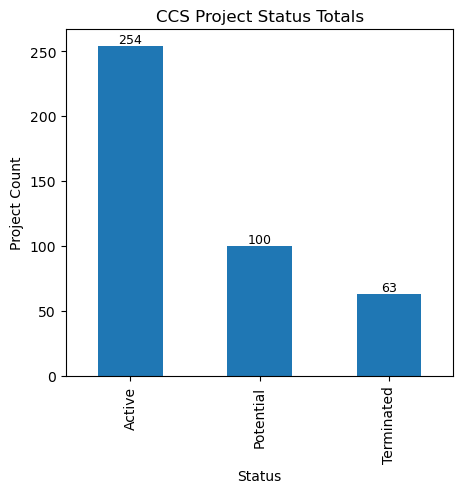

In [63]:
#Create a series for Overall status using value count and plot the series
totalStatus2 = locationStatus["Overall Status"].value_counts()
ax = totalStatus2.plot(kind="bar", figsize=(5,4.5))

# Annotate each bar with its total
for i, value in enumerate(totalStatus2):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=9, color='black')

# Add title and labels
plt.title("CCS Project Status")
plt.xlabel("Status")
plt.ylabel("Project Count")

plt.show()

In [62]:
# dfNew.to_csv("CCS Map Data.csv")